# Creating a mass plot from CERN OpenData

In this example, we'll import some detector data and make a plot of the masses of the particles detected.

To begin, click the "play" icon or press shift+ENTER to execute each cell.

In [14]:
# First, we'll "import" the software packages needed.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
inline_rc = dict(mpl.rcParams)

# Starting a line with a hashtag tells the program not to read the line.
# That way we can write "comments" to humans trying to figure out what the code does.
# Blank lines don't do anything either, but they can make the code easier to read.

## Importing a data set
Now let's choose some data to plot. In this example we'll pull data from CERN's CMS detector and make a histogram of invariant mass. You can find more at CERN OpenData

This next cell will take a little while to run since it's grabbing a pretty big data set. This one contains 100,000 collision events. The cell label will look like "In [\*]" while it's still thinking and "In [2]" when it's finished.

In [3]:
# Whenever you type "something =" it defines a new variable, "something", 
# and sets it equal to whatever follows the equals sign. That could be a number, 
# another variable, or in this case an entire table of numbers.
data = pd.read_csv('http://opendata.cern.ch/record/304/files/dielectron.csv')

# Analyze dielectron data instead by referencing this URL:
# http://opendata.cern.ch/record/303/files/dimuon.csv

We can view the first few rows of the file we just imported.

In [5]:
# The .head(n) command displays the first n rows of the file.
data.head(3)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.03234,-1.88066,-11.0778,2.14537,-2.344030,-2.07281,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.71350,5.04474,11.4647,12.75360,0.808077,2.73492,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.47280,2.25895,-15.5888,2.69667,-2.455080,2.14857,1,38.38770


## Making a histogram
CMS software calculated the invariant mass of a possible parent particle, based on the two particles' energies and momenta. It's in the last column, labeled "M". The code below makes a histogram of those mass values.

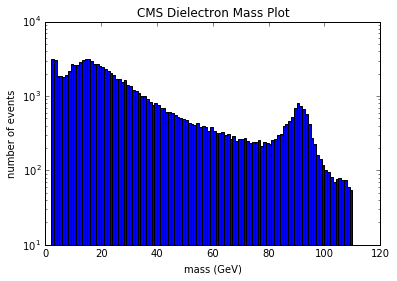

In [7]:
# adding a ; at the end of the next line will  "suppress" the text output of the histogram's frequency table
plt.hist(data.M, bins=120, range=[0,120], log=True)
plt.title("CMS Dielectron Mass Plot")
plt.xlabel("mass (GeV)")
plt.ylabel("number of events")

# Part Two
Create a histogram to show the production of one of the following particles: [J/$\Psi$](https://en.wikipedia.org/wiki/J/psi_meson), [Upsilon](https://en.wikipedia.org/wiki/Upsilon_meson) ($\Upsilon$), or [Z](https://en.wikipedia.org/wiki/W_and_Z_bosons).

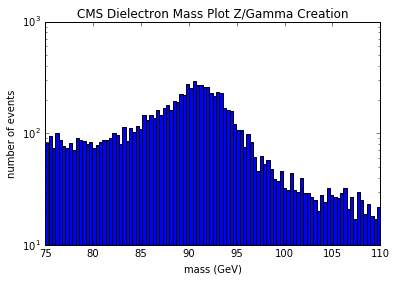

In [8]:
plt.hist(data.M, bins = 100, range=[75,110], log=True)
plt.title("CMS Dielectron Mass Plot Z/Gamma Creation")
plt.xlabel("mass (GeV)")
plt.ylabel("number of events")

# Part Three
Try selecting a subset of the events to analyze. This is called "applying cuts" to your data. Below are a few commands you may find useful.

In [10]:
# create a new data set of only the events containing oppositely charges particles
data2 = data[data.Q1 == data.Q2] # change != to == for same charge

In [12]:
data3 = data[data.Q1 != data.Q2] #opp charge

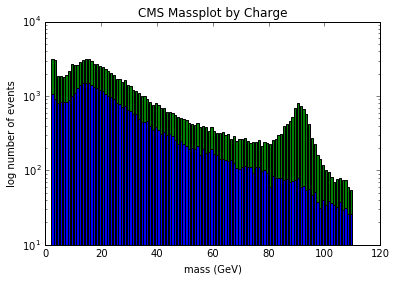

In [13]:
plt.hist([data2.M, data3.M], range=[0,120], stacked=True, label=["same Q","opp Q"], bins=120, log=True);
plt.title("CMS Massplot by Charge")
plt.xlabel("mass (GeV)")
plt.ylabel("log number of events")

In [ ]:
# create a new data set of only events in a certain mass range
# data3 = data[(data.M > 50) & (data.M < 80)] # this choses 50 to 80 GeV

In [ ]:
# make a scatterplot of two columns
# plt.scatter(x_column, y_column, s=point_size, other parameters)
plt.scatter(data.eta1, data.phi1, s=.05)

In [ ]:
# make your plots look like they're from xkcd.com
plt.xkcd()

# to make normal-looking plots again execute:
# mpl.rcParams.update(inline_rc)

# plt.hist can stack two histograms
d1 = data[data.Q1 == data.Q2]
d2 = data[data.Q1 != data.Q2]

plt.hist([d1.M, d2.M], range=[2,5], stacked=True, label=["same Q","opp Q"], bins=20, log=True)
plt.title("Cutting on net charge")
plt.xlabel("mass (GeV)")
plt.ylabel("log number of events")
plt.legend()

## Save Your Work

Download this notebook and upload it to your GitHub. Need a refresher? [Find instructions here](https://drive.google.com/open?id=1GszC6t8K9gSKdR-cigtoxaHK8V1IL_K2PXo5L87Z9xo).